# Tactical Approach & Playing Style of Spurs Under Pochettino

*This notebook attempts to visualise Pochettino's playstyle and tactics through the use of Heatmaps and other in-match statistics.We will retrieve tottenham Data from Statsbomb, which includes the statistics from Pochettino's tenure with Spurs during the Premier League 15/16 season*

*We can only analyze the statistics and data that are available, and the framework used here is based on both research and personal observations of Pochettino’s team. There may be deeper underlying patterns or exceptions that can only be uncovered through more advanced analytical techniques or detailed video analysis. As such, the findings may carry some bias and are not without limitations. Football, after all, is best understood by watching matches. Still, by examining these data points, we gain a useful baseline understanding of how Pochettino structured his team and the tactical approaches he implemented.*


In [1]:
!pip install statsbombpy

In [2]:
# import packages 
import pandas as pd
from statsbombpy import sb
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

competitions = sb.competitions()
competitions 

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


## Find Premier League Matches Under Pochettino

In [3]:
#Find the competition ID for the Premier League
epl_id = competitions[competitions["competition_name"] == "Premier League"]["competition_id"].values[0]

#Find the season ID for 2015-16
season_id = competitions[(competitions["competition_id"] == epl_id) & (competitions["season_name"] == "2015/2016")]["season_id"].values[0]

#Retrieve all Premier League 2015-16 matches
matches = sb.matches(competition_id=epl_id, season_id=season_id)

#Filter matches where Tottenham played
spurs_matches = matches[(matches["home_team"] == "Tottenham Hotspur") | (matches["away_team"] == "Tottenham Hotspur")]

# Display Tottenham's 2015-16 Premier League Matches
pd.set_option("display.max_rows", None)
print(spurs_matches[["match_id", "home_team", "away_team", "match_date"]])


     match_id             home_team             away_team  match_date
7     3754043     Tottenham Hotspur       AFC Bournemouth  2016-03-20
13    3754053           Aston Villa     Tottenham Hotspur  2016-03-13
36    3754029     Tottenham Hotspur           Aston Villa  2015-11-02
51    3754074          Swansea City     Tottenham Hotspur  2015-10-04
63    3754093     Tottenham Hotspur               Chelsea  2015-11-29
70    3754057     Tottenham Hotspur          Norwich City  2015-12-26
78    3754097     Manchester United     Tottenham Hotspur  2015-08-08
81    3754148            Sunderland     Tottenham Hotspur  2015-09-13
97    3754188           Southampton     Tottenham Hotspur  2015-12-19
108   3754198     Tottenham Hotspur             Liverpool  2015-10-17
110   3754222     Tottenham Hotspur        Crystal Palace  2015-09-20
114   3754197     Tottenham Hotspur       Manchester City  2015-09-26
123   3754270     Tottenham Hotspur            Stoke City  2015-08-15
131   3754234       

The statsbomb package only has all 35 matches of he 2015/16 season available, hence we will use it to analyse Poch's tactical approach and playstyle

##  Find Spurs Players to Calculate Statistics

In [5]:
# Initialize list to store all match events (not just spurs) - for comparison
all_events = []

for match_id in matches["match_id"]:
    df = sb.events(match_id=match_id)
    df["match_id"] = match_id
    all_events.append(df)
    
# Initialize list to store Spurs' match events
spurs_player_events = []

# Loop through each Spurs match
for match_id in spurs_matches["match_id"]:
    match_events = sb.events(match_id=match_id)
    
    # Ensure only events with a valid player name are selected
    player_events = match_events.dropna(subset=["player"]).copy()

    # Assign match_id safely
    player_events["match_id"] = match_id  
    spurs_player_events.append(player_events)

# Combine All Player Events into One DataFrame
players = pd.concat(spurs_player_events, ignore_index=True)

# Show all unique event types in the dataset
unique_event_types = players["type"].unique()
print(unique_event_types)

# Show all Spurs players
spurs_players_1516 = players[players["team"] == "Tottenham Hotspur"]["player"].unique()
spurs_players_1516


['Pass' 'Ball Receipt*' 'Carry' 'Pressure' 'Miscontrol' 'Shot'
 'Goal Keeper' 'Clearance' 'Ball Recovery' 'Duel' 'Dribble' 'Interception'
 'Dispossessed' 'Dribbled Past' 'Block' 'Foul Committed' 'Foul Won'
 'Substitution' 'Injury Stoppage' 'Error' 'Shield' 'Offside'
 'Own Goal Against' '50/50' 'Player Off' 'Player On' 'Bad Behaviour']


array(['Bamidele Alli', 'Harry Kane', 'Kevin Wimmer', 'Hugo Lloris',
       'Kyle Walker', 'Eric Dier', 'Erik Lamela', 'Danny Rose',
       'Christian Dannemann Eriksen', 'Mousa Sidi Yaya Dembélé',
       'Toby Alderweireld', 'Tom Carroll', 'Ryan Mason', 'Nacer Chadli',
       'Jan Vertonghen', 'Ben Davies', 'Josh Onomah', 'Andros Townsend',
       "Clinton Mua N''Jie", 'Heung-Min Son', 'Nabil Bentaleb',
       'Michel Vorm', 'Kieran Trippier', 'Alex Pritchard'], dtype=object)

## Drawing Pitch Canvas For Heatmap Analysis and Other Actions 

In [6]:

#draw pitch for visualisation
def draw_pitch(ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Pitch Outline & Centre Line
    plt.plot([0, 120], [0, 0], color="black")
    plt.plot([0, 120], [80, 80], color="black")
    plt.plot([0, 0], [0, 80], color="black")
    plt.plot([120, 120], [0, 80], color="black")
    plt.plot([60, 60], [0, 80], color="black")

    # Left Penalty Area
    plt.plot([0, 18], [18, 18], color="black")
    plt.plot([18, 18], [18, 62], color="black")
    plt.plot([18, 0], [62, 62], color="black")

    # Right Penalty Area
    plt.plot([120, 102], [18, 18], color="black")
    plt.plot([102, 102], [18, 62], color="black")
    plt.plot([102, 120], [62, 62], color="black")

    # Left 6-yard Box
    plt.plot([0, 6], [30, 30], color="black")
    plt.plot([6, 6], [30, 50], color="black")
    plt.plot([6, 0], [50, 50], color="black")

    # Right 6-yard Box
    plt.plot([120, 114], [30, 30], color="black")
    plt.plot([114, 114], [30, 50], color="black")
    plt.plot([114, 120], [50, 50], color="black")

    # Centre Circle & Penalty Spots
    centre_circle = plt.Circle((60, 40), 9, color="black", fill=False)
    centre_spot = plt.Circle((60, 40), 0.8, color="black")
    left_pen_spot = plt.Circle((12, 40), 0.8, color="black")
    right_pen_spot = plt.Circle((108, 40), 0.8, color="black")

    ax.add_patch(centre_circle)
    ax.add_patch(centre_spot)
    ax.add_patch(left_pen_spot)
    ax.add_patch(right_pen_spot)

    plt.xlim(0, 120)
    plt.ylim(0, 80)
    plt.xticks([])
    plt.yticks([])
    return ax

# How Fullbacks Powered Pochettino’s Offense

Renowned for his overlapping fullbacks, Poch effectively utilized them in his attacking strategy. The function below generates heatmaps displaying ball receipts from fullbacks, illustrating how Poch deployed them in his tactical setup.

## Define Function to Generate Heatmap for Ball Receipts From Fullbacks



In [7]:
def plot_fullback_heatmap(player_name):
    global players
    df_filtered = players[(players["player"] == player_name) & 
                                   players["type"].isin(["Ball Receipt*"])].dropna(subset=["location"])

    # Extract x, y coordinates from location column (which is stored as a list)
    df_filtered["x"] = df_filtered["location"].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    df_filtered["y"] = df_filtered["location"].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

    # Drop rows where x or y is missing
    df_filtered = df_filtered.dropna(subset=["x", "y"])

    # Generate heatmap
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = draw_pitch(ax)  
    sns.kdeplot(x=df_filtered["x"], y=df_filtered["y"], cmap="Blues", fill=True, bw_adjust=0.5, ax=ax)
    plt.title(f"Heatmap of {player_name}'s Ball Receipts (2015-16)")
    plt.show()



## Generating Heatmaps for Ball Receipts of Fullbacks

We will see how Poch utillised his fullbacks: 

- Danny rose 
- Kieran Tripper 
- kyle walker
- Ben davies

**Danny Rose**


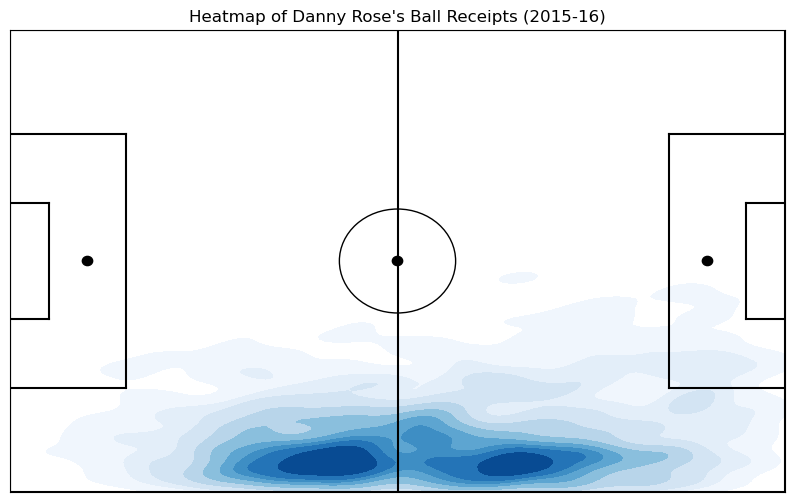

In [8]:
plot_fullback_heatmap('Danny Rose')

**Kieran**


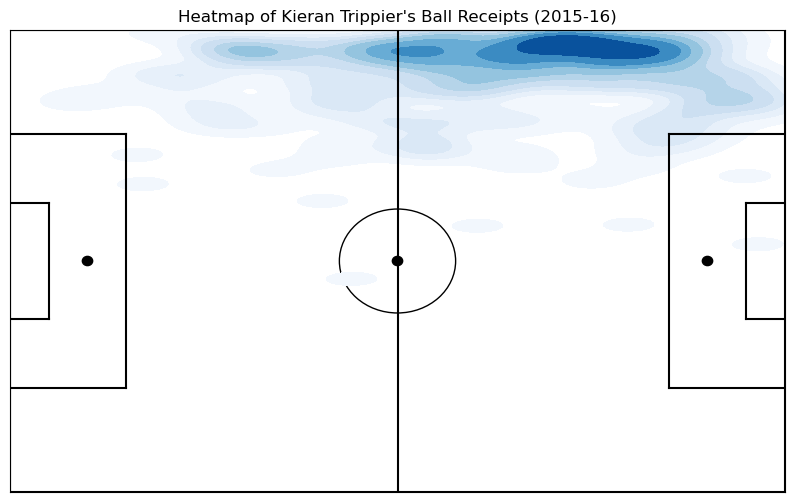

In [9]:
plot_fullback_heatmap('Kieran Trippier')

**Walker**

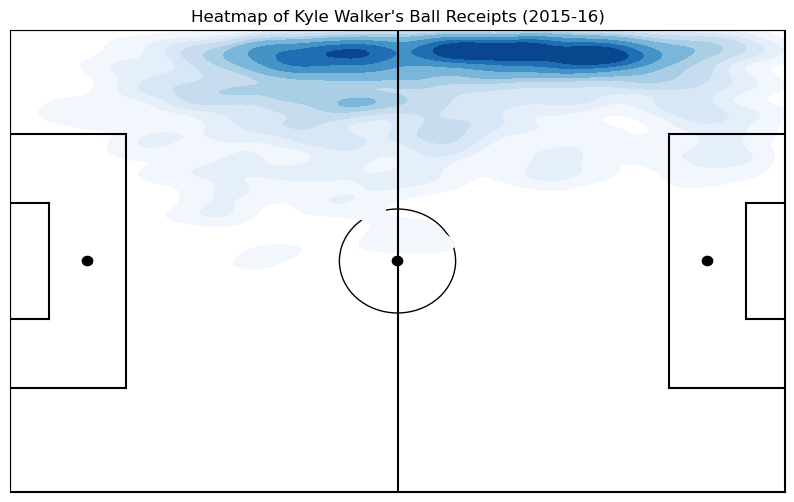

In [10]:
plot_fullback_heatmap('Kyle Walker')

**Ben Davies**

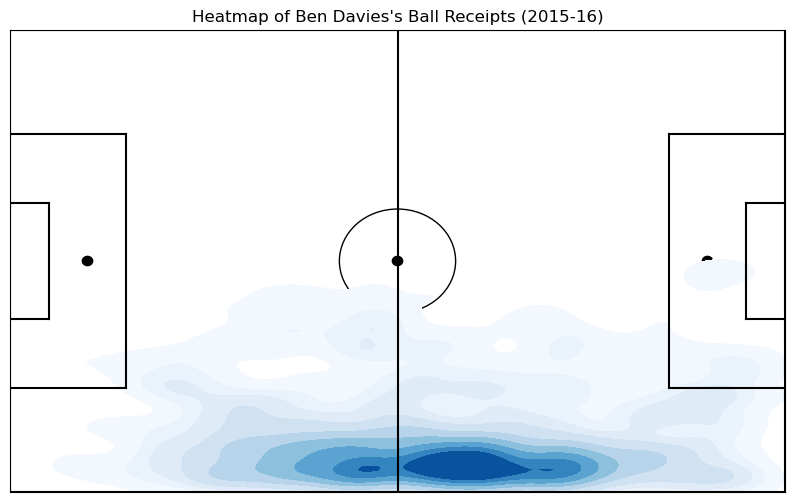

In [11]:
plot_fullback_heatmap('Ben Davies')

# 'Feeders' of Harry Kane



Kane was undoubtedly a key figure, if not the most important player in Pochettino’s Spurs side. With 25 goals in the 2015/16 season, it’s clear he played the role of a central target man within the system. By analyzing the passes received by Kane, we can gain valuable insight into how the team was structured around him, including which players were most responsible for supplying him and how attacking movements were built to support his goal-scoring opportunities.

In [47]:
#Filter for shot events where outcome is a goal
df_goals = df_all_events[
    (df_all_events["type"] == "Shot") & 
    (df_all_events["shot_outcome"] == "Goal") &
    (df_all_events["team"] == "Tottenham Hotspur")
]

# Step 2: Count goals per player
top_scorers = df_goals["player"].value_counts().head(5)

# Display result
print("Top Spurs Goal Scorers (2015/16 Season):")
print(top_scorers)


Top Spurs Goal Scorers (2015/16 Season):
player
Harry Kane                     25
Bamidele Alli                  10
Christian Dannemann Eriksen     6
Erik Lamela                     5
Heung-Min Son                   4
Name: count, dtype: int64


**Top Passers and Assisters to Harry Kane**

In [49]:
#Filter for completed passes
df_passes = df_all_events[(df_all_events["type"] == "Pass") & (df_all_events["pass_outcome"].isna())].copy()

#passes received by Harry Kane
passes_to_kane = df_passes[df_passes["pass_recipient"] == "Harry Kane"]

#goal assists to Harry Kane
kane_assists = df_passes[(df_passes["pass_goal_assist"] == True) & (df_passes["pass_recipient"] == "Harry Kane")]

#Count Values for top 3 passers to Harry Kane
top_passers = passes_to_kane["player"].value_counts().head(6)
top_assisters = kane_assists["player"].value_counts().head(6)

# Print Results
print("Top 3 players who passed most to Harry Kane:")
print(top_passers)
print("Top 3 players who assisted most to Harry Kane:")
print(top_assisters)



Top 3 players who passed most to Harry Kane:
player
Christian Dannemann Eriksen    178
Bamidele Alli                  118
Kyle Walker                    109
Danny Rose                     105
Erik Lamela                     89
Eric Dier                       82
Name: count, dtype: int64
Top 3 players who assisted most to Harry Kane:
player
Bamidele Alli                  6
Erik Lamela                    3
Christian Dannemann Eriksen    3
Kyle Walker                    1
Danny Rose                     1
Nacer Chadli                   1
Name: count, dtype: int64


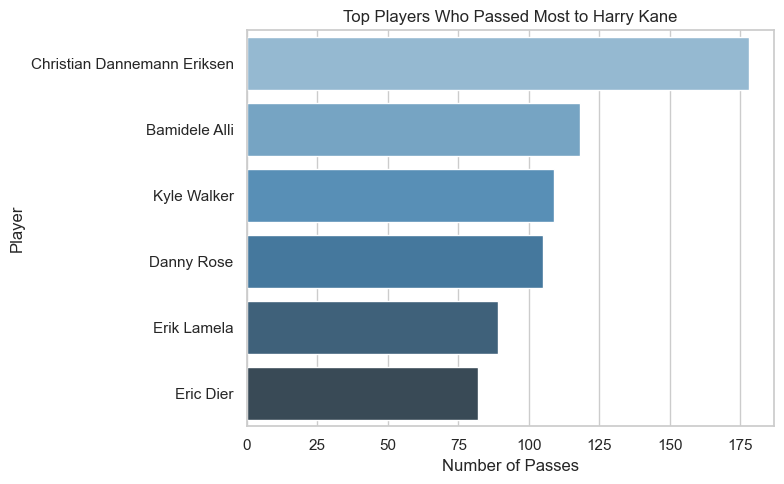

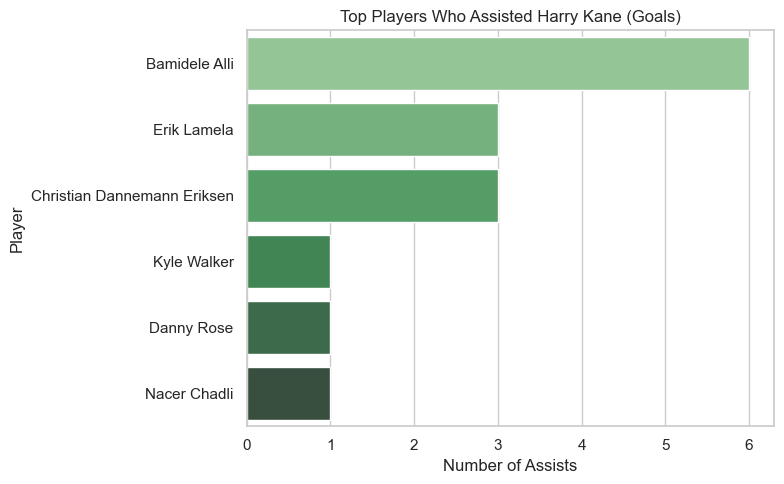

In [52]:
# Plot Top Passers to Harry Kane
plt.figure(figsize=(8, 5))
sns.barplot(x=top_passers.values, y=top_passers.index, palette="Blues_d")
plt.title("Top Players Who Passed Most to Harry Kane")
plt.xlabel("Number of Passes")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

# Plot Top Assisters to Harry Kane
plt.figure(figsize=(8, 5))
sns.barplot(x=top_assisters.values, y=top_assisters.index, palette="Greens_d")
plt.title("Top Players Who Assisted Harry Kane (Goals)")
plt.xlabel("Number of Assists")
plt.ylabel("Player")
plt.tight_layout()
plt.show()


It's no surprise that Harry Kane received most of his passes from central attacking midfielders, as expected in Pochettino's system. However, what’s most particularly telling is that among the most frequent pass providers and assisters were not wingers, but rather Pochettino’s two main wing-backs, **Kyle Walker and Danny Rose**. This further reinforces the well-known tactical trait of Pochettino's Spurs: a heavy reliance on full-backs in the attack. Their consistent supply of passes to Kane highlights how integral they were in advancing play and supporting the striker from wide areas.

## Progressive Carries

To calculate progressive carries, we can isolating all events labeled as "Carry" in the StatsBomb event data. Each carry event includes a starting location ('location') and an ending location ('carry_end_location'), represented by x and y coordinates on the pitch. By extracting the horizontal start (x_start) and end (x_end) values, we can calculate the distance a player advanced the ball toward the opponent’s goal using carry_distance = x_end - x_start. 

**What Counts as a 'Progressive' carry?**

We will set the 'progressive' threshold to >10 meters, because only carries >10 typically will be able to advance the ball upfield and contribute to breaking defensive lines.

**Comparing Spurs' Progressive Carries Against Premier League Teams**

To see how spurs' progressive carries were integral to Pochetinno's style of play, we will compare the combined progressive carries to well known teams in the league:

- Sunderland (Placed 17th - Well known for long ball plays and minimal build-up through carries.) 
- Liverpool (Placed 8th - Well known for counter pressing and transitions)
- Leichester (Placed 1st - Well known for counter attacks rather than slow build up play)
- Man City (Placed 4th - Well known for midfield control and positional play)

In [39]:
# Filter carries only
df_all_events = pd.concat(all_events, ignore_index=True)
df_carry = df_all_events[df_all_events["type"] == "Carry"].copy()
pd.set_option('display.max_columns', None)
df_carry.head()

,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_punched_out,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,miscontrol_aerial_won,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_height,pass_inswinging,pass_length,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,50_50,bad_behaviour_card,ball_recovery_offensive,block_offensive,goalkeeper_shot_saved_off_target,shot_open_goal,shot_saved_off_target,goalkeeper_shot_saved_to_post,injury_stoppage_in_chain,pass_goal_assist,pass_straight,pass_no_touch,clearance_other,pass_miscommunication,shot_saved_to_post,block_deflection,dribble_no_touch,shot_redirect,block_save_block,shot_deflected,player_off_permanent,goalkeeper_success_in_play,shot_follows_dribble,goalkeeper_lost_out,half_start_late_video_start,goalkeeper_lost_in_play,goalkeeper_penalty_saved_to_post,goalkeeper_saved_to_post
1932,NaN,NaN,"[60.4, 43.6]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a936e18c-3979-4576-8cc0-94114f1599db,7,NaN,"[60.4, 43.6]",3754058,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,Joshua King,3346.0,Center Forward,2,AFC Bournemouth,28,"[0fee7719-7e69-49c5-be81-3f2b77da604e, 1f98c89...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFC Bournemouth,28,00:00:02.061,Carry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1933,NaN,NaN,"[37.5, 74.6]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d031d1d6-600c-4234-ac87-8e9eb9efdeee,12,NaN,"[37.5, 76.1]",3754058,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,Adam Smith,6409.0,Right Back,2,AFC Bournemouth,28,"[4e43a985-9566-4762-868f-c992de243bd6, 56da36e...",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFC Bournemouth,28,00:00:05.465,Carry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934,NaN,NaN,"[27.4, 63.9]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.408972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d507ebad-3228-416c-9a9e-785a82c966bc,15,NaN,"[27.4, 58.1]",3754058,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,Simon Francis,3608.0,Right Center Back,2,AFC Bournemouth,28,"[a4eb31c9-6417-4a65-9f71-b3aeece1758e, bcfea2e...",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFC Bournemouth,28,00:00:07.941,Carry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1935,NaN,NaN,"[30.4, 78.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.283794,NaN,NaN,NaN,NaN,N

In [35]:

# start and end coordinates
df_carry["x_start"] = df_carry["location"].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
df_carry["x_end"] = df_carry["carry_end_location"].apply(lambda loc: loc[0] if isinstance(loc, list) else None)

# Calculate carry distance
df_carry["carry_distance"] = df_carry["x_end"] - df_carry["x_start"]

# Filter for progressive carries by Team 
df_prog_Sunderland = df_carry[(df_carry["team"] == "Sunderland") & (df_carry["carry_distance"] > 10)]
df_prog_liverpool = df_carry[(df_carry["team"] == "Liverpool") & (df_carry["carry_distance"] > 10)]
df_prog_leichester = df_carry[(df_carry["team"] == "Leicester City") & (df_carry["carry_distance"] > 10)]
df_prog_Manchester_City = df_carry[(df_carry["team"] == "Manchester City") & (df_carry["carry_distance"] > 10)]
df_prog_spurs = df_carry[(df_carry["team"] == "Tottenham Hotspur") & (df_carry["carry_distance"] > 10)]

##Count progressive carries by distance
# Sunderland (Placed 17th)
Sunderland_over_10 = df_prog_Sunderland.shape[0]
Sunderland_over_20 = df_prog_Sunderland[df_prog_Sunderland["carry_distance"] > 20].shape[0]
Sunderland_over_30 = df_prog_Sunderland[df_prog_Sunderland["carry_distance"] > 30].shape[0]

# Liverpool (Placed 8th)
liverpool_over_10 = df_prog_liverpool.shape[0]
liverpool_over_20 = df_prog_liverpool[df_prog_liverpool["carry_distance"] > 20].shape[0]
liverpool_over_30 = df_prog_liverpool[df_prog_liverpool["carry_distance"] > 30].shape[0]

# Leichester (Placed 1st)
leichester_over_10 = df_prog_leichester.shape[0]
leichester_over_20 = df_prog_leichester[df_prog_leichester["carry_distance"] > 20].shape[0]
leichester_over_30 = df_prog_leichester[df_prog_leichester["carry_distance"] > 30].shape[0]

# Manchester City (Placed 4th)
Manchester_City_over_10 = df_prog_Manchester_City.shape[0]
Manchester_City_over_20 = df_prog_Manchester_City[df_prog_Manchester_City["carry_distance"] > 20].shape[0]
Manchester_City_over_30 = df_prog_Manchester_City[df_prog_Manchester_City["carry_distance"] > 30].shape[0]

# Tottenham (Placed 3rd)
spurs_over_10 = df_prog_spurs.shape[0]
spurs_over_20 = df_prog_spurs[df_prog_spurs["carry_distance"] > 20].shape[0]
spurs_over_30 = df_prog_spurs[df_prog_spurs["carry_distance"] > 30].shape[0]

# Print results
print("Sunderland Progressive Carries:")
print(f">10m: {Sunderland_over_10}")
print(f">20m: {Sunderland_over_20}")
print(f">30m: {Sunderland_over_30}\n")

print("Liverpool Progressive Carries:")
print(f">10m: {liverpool_over_10}")
print(f">20m: {liverpool_over_20}")
print(f">30m: {liverpool_over_30}\n")

print("Leichester Progressive Carries:")
print(f">10m: {leichester_over_10}")
print(f">20m: {leichester_over_20}")
print(f">30m: {leichester_over_30}\n")

print("Manchester City Progressive Carries:")
print(f">10m: {Manchester_City_over_10}")
print(f">20m: {Manchester_City_over_20}")
print(f">30m: {Manchester_City_over_30}\n")

print("Spurs Progressive Carries:")
print(f">10m: {spurs_over_10}")
print(f">20m: {spurs_over_20}")
print(f">30m: {spurs_over_30}")

Sunderland Progressive Carries:
>10m: 1190
>20m: 393
>30m: 131

Liverpool Progressive Carries:
>10m: 1827
>20m: 587
>30m: 193

Leichester Progressive Carries:
>10m: 1275
>20m: 410
>30m: 158

Manchester City Progressive Carries:
>10m: 1740
>20m: 459
>30m: 147

Spurs Progressive Carries:
>10m: 1756
>20m: 532
>30m: 159


**Progressive Caries over 10m by Premier League Team**

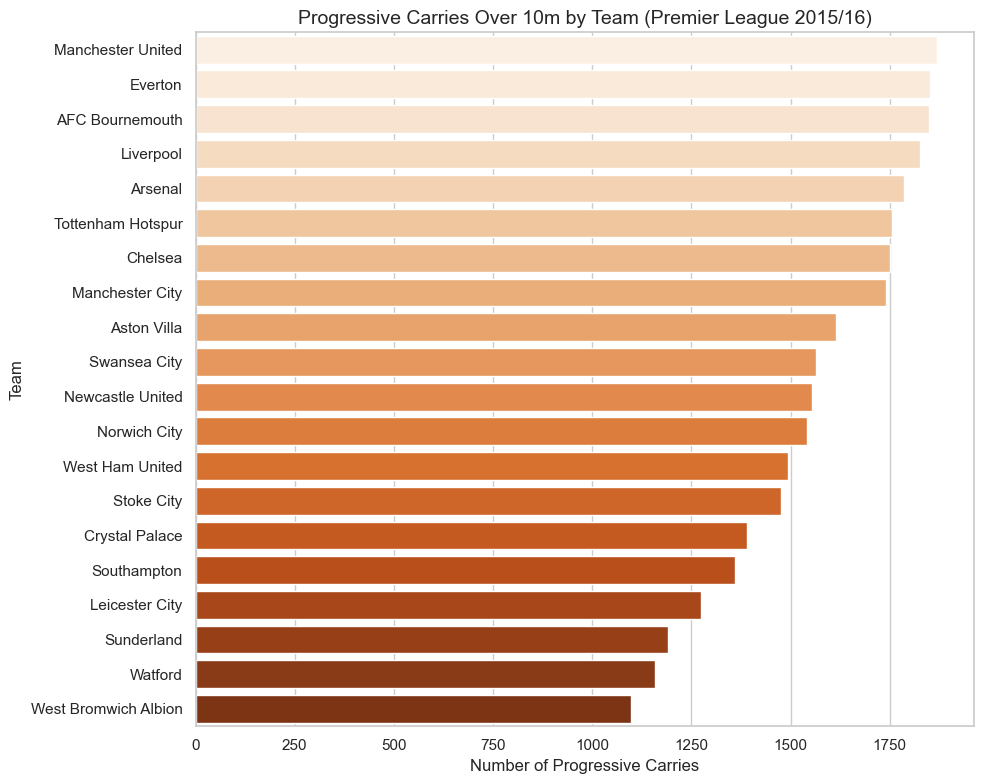

In [74]:
# Filter progressive carries (>10m)
df_prog_carry_over10 = df_carry[df_carry["carry_distance"] > 10]

# count progressive carries per team
team_prog_carry_counts = df_prog_carry_over10["team"].value_counts().sort_values(ascending=False)

# Plot bar
plt.figure(figsize=(10, 8))
sns.barplot(x=team_prog_carry_counts.values, y=team_prog_carry_counts.index, palette="Oranges")
plt.title("Progressive Carries Over 10m by Team (Premier League 2015/16)", fontsize=14)
plt.xlabel("Number of Progressive Carries")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


# Progressive Carry Heatmap (Spurs)

To visualize progressive carries used by Pochettino, we can use a heatmap that shows where on the pitch players usually start their forward runs with the ball. We do this by plotting the starting positions (x and y coordinates) of each progressive carry. 

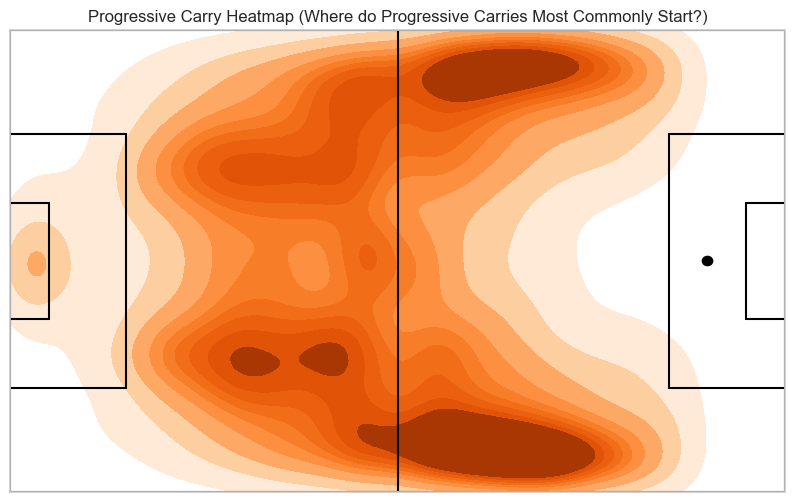

In [79]:
#Filter carrie by spurs players 
df_carry_spurs = df_all_events[(df_all_events["type"] == "Carry") & (df_all_events["team"] == "Tottenham Hotspur")].copy()

#Extract start and end locations
df_carry_spurs["x_start"] = df_carry_spurs["location"].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
df_carry_spurs["y_start"] = df_carry_spurs["location"].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

#Extract End Locations
df_carry_spurs["x_end"] = df_carry_spurs["carry_end_location"].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
df_carry_spurs["y_end"] = df_carry_spurs["carry_end_location"].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

# Filter for progressive carries less than 40m
df_progressive_carry = df_carry[df_carry["carry_distance"] > 10]

# Plot graph for progressive carries
fig, ax = plt.subplots(figsize=(10, 6))
ax = draw_pitch(ax)
sns.kdeplot(x=df_progressive_carry["x_start"], y=df_progressive_carry["y_start"], cmap="Oranges", fill=True, ax=ax)
plt.title("Progressive Carry Heatmap (Where do Progressive Carries Most Commonly Start?)")
plt.show()


The heatmap shows that most progressive carries begin in midfield areas and along the wings, just past the halfway line. This supports the idea that Pochettino's full-backs played a crucial role in advancing the ball and building attacks. Additionally, the density of carries in central areas suggests that his midfielders were actively involved in pushing forward into dangerous zones, likely with the intent of creating opportunities and supplying the attacking players.

# High Press System 

## Press

Pochettino is well known for his high-press playstyle, often relying on his forwards and central midfielders to apply pressure high up the pitch. To assess the intensity of Spurs’ pressing under his management during the 2015/16 season, we examine the number of recorded 'Pressure' events. By comparing these pressing actions across all Premier League teams, we can better understand how aggressively Spurs pressed their opponents relative to the rest of the league.



**Average Pressures per Match by Team**

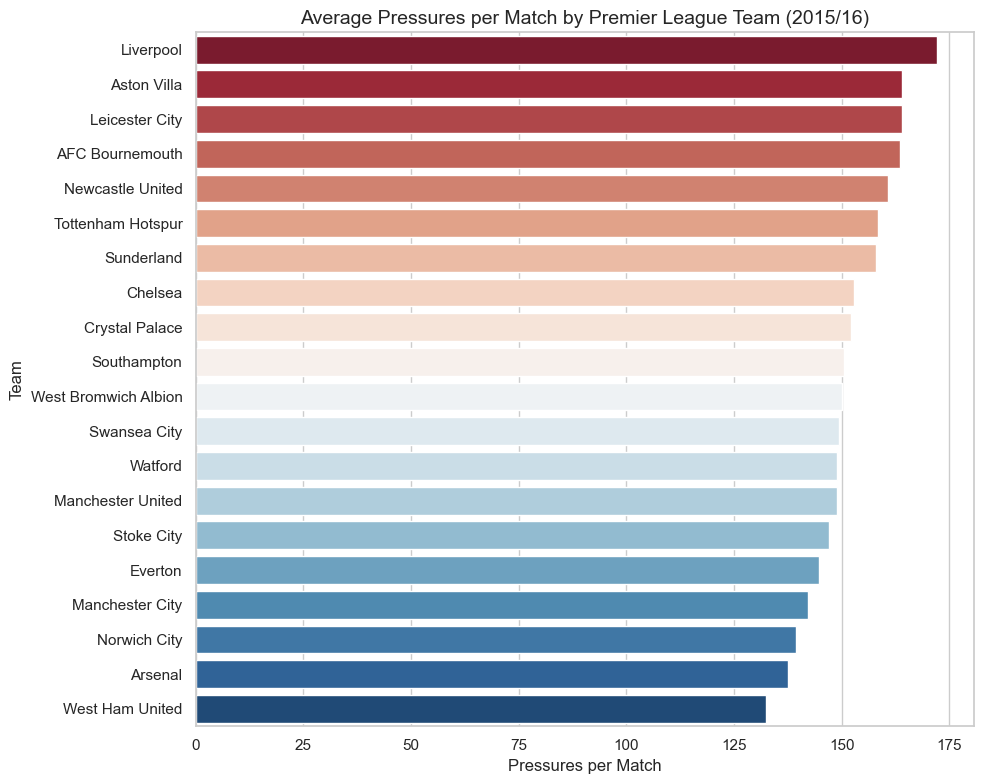

In [65]:
# Filter pressure events
df_pressures = df_all_events[df_all_events["type"] == "Pressure"].copy()

# pressure actions per team
pressure_counts = df_pressures["team"].value_counts()

# Count matches per team (to normalize per match)
team_match_counts = df_all_events.groupby("team")["match_id"].nunique()

# Calculate average pressures per match
pressures_per_match = pressure_counts / team_match_counts
pressures_per_match = pressures_per_match.sort_values(ascending=False)

# rank and plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x=pressures_per_match.values, y=pressures_per_match.index, palette="RdBu")
plt.title("Average Pressures per Match by Premier League Team (2015/16)", fontsize=14)
plt.xlabel("Pressures per Match")
plt.ylabel("Team")
plt.tight_layout()
plt.show()




> Pochettino’s Spurs ranked 6th in the league for pressure actions per match—a relatively high position. This is indicative that he consistently employed a pressing into his tactics, similar to other aggressive teams like Liverpool and Aston Villa.



**Pressure Events by Spurs Players** 

> Now that we’ve established Pochettino’s use of an effective pressing tactic, we can dive deeper to see which players or which positions were most involved in the pressing. To do this, we’ll plot Spurs players based on the number of pressing actions they recorded. 


Top Spurs Players by Pressure Actions (2015/16):


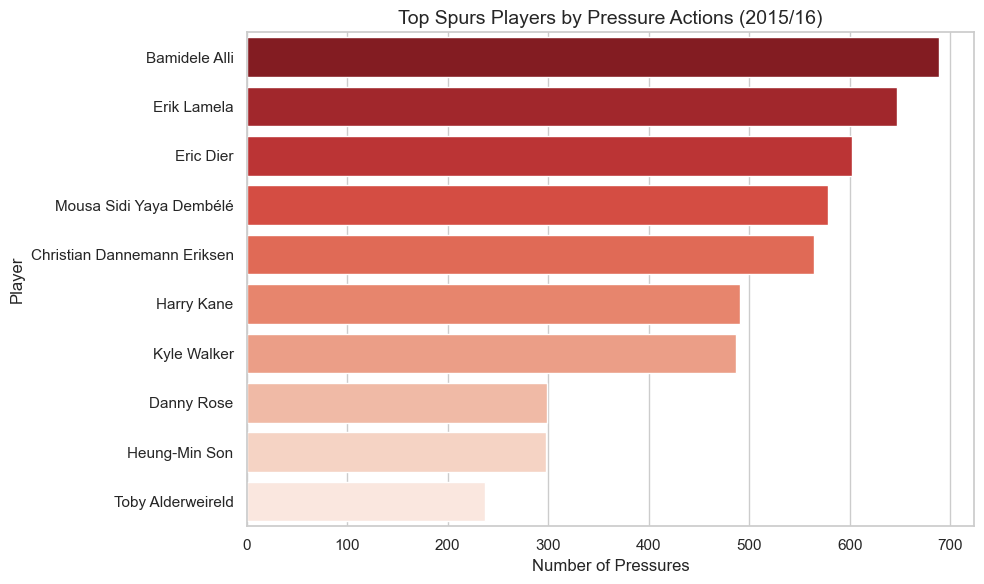

In [80]:
# Filter Pressure events by Spurs
spurs_pressures = df_all_events[(df_all_events["type"] == "Pressure") & (df_all_events["team"] == "Tottenham Hotspur")]

# Count pressures per player
spurs_press_counts = spurs_pressures["player"].value_counts()

# print
print("Top Spurs Players by Pressure Actions (2015/16):")
spurs_press_counts

# visualise with bar chart 
plt.figure(figsize=(10, 6))
sns.barplot(x=spurs_press_counts.head(10).values,y=spurs_press_counts.head(10).index,palette="Reds_r")
plt.title("Top Spurs Players by Pressure Actions (2015/16)", fontsize=14)
plt.xlabel("Number of Pressures")
plt.ylabel("Player")
plt.tight_layout()
plt.show()



> The graph shows that attackers led the way in pressing actions, with Dele Alli and Erik Lamela recording the highest numbers. They were followed by Spurs' defensive midfielders and fullbacks. Based on this initial look at the data, it’s reasonable to roughly conclude that Pochettino employed a relatively high-pressing system, with his forwards actively leading the press. 

> For a deeper analysis, we can observe the Heatmaps for pressing actions commited by these players using the function defined below 


## Define Function to Generate Heatmap for Pressing Actions



In [12]:
def plot_pressure_heatmap(player_name):
    global players
    
    # Extract events where location data exists
    df_filtered = players[(players["player"] == player_name) & 
                                   players["type"].isin(["Pressure"])].dropna(subset=["location"])

    # Extract x, y coordinates from location column 
    df_filtered["x"] = df_filtered["location"].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    df_filtered["y"] = df_filtered["location"].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

    # Drop rows where x or y is missing
    df_filtered = df_filtered.dropna(subset=["x", "y"])

    # Generate heatmap
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = draw_pitch(ax)  
    sns.kdeplot(x=df_filtered["x"], y=df_filtered["y"], cmap="Reds", fill=True, bw_adjust=0.5, ax=ax)
    plt.title(f"Heatmap of {player_name}'s Pressing Actions (2015-16)")
    plt.show()


## Generating Heatmaps for Pochettino's Main Forward's Pressing Actions 

>Pressing Actions for the following forwards: 


**Dele Alli**

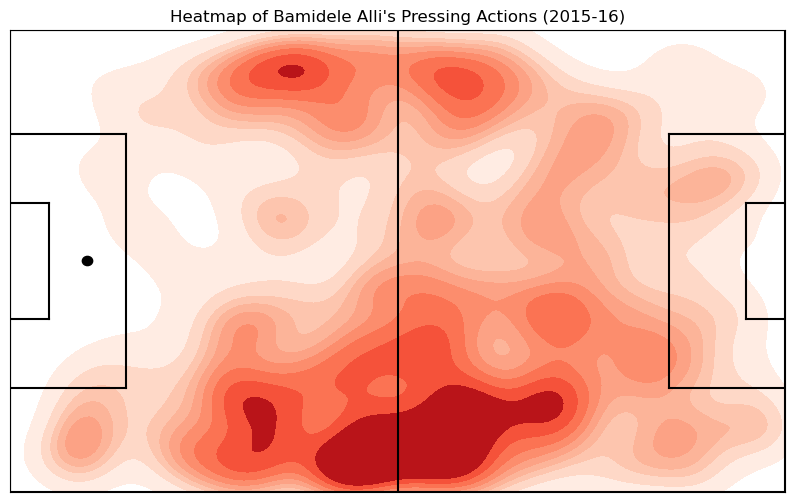

In [16]:
plot_pressure_heatmap('Bamidele Alli')


**Erik Lamela**

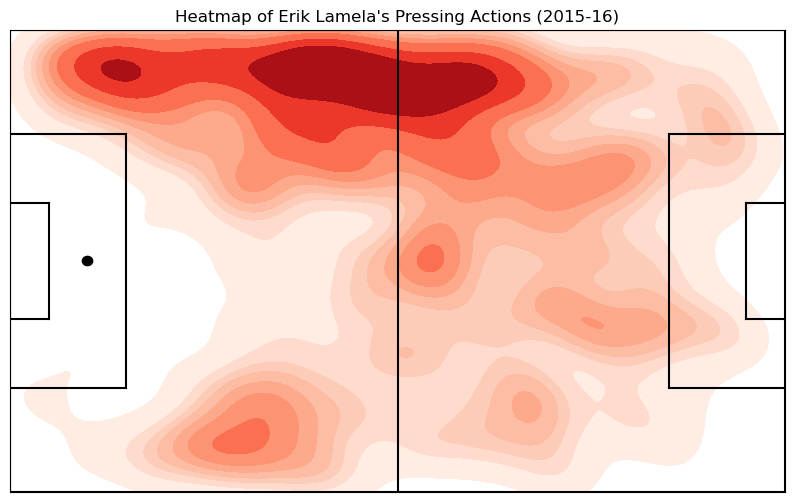

In [17]:
plot_pressure_heatmap('Erik Lamela')

**Eric Dier**

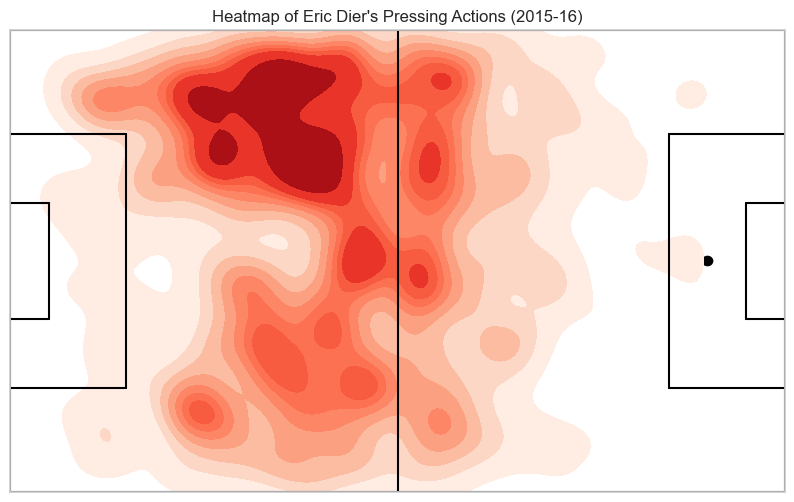

In [70]:
plot_pressure_heatmap('Eric Dier')

**Dembele**

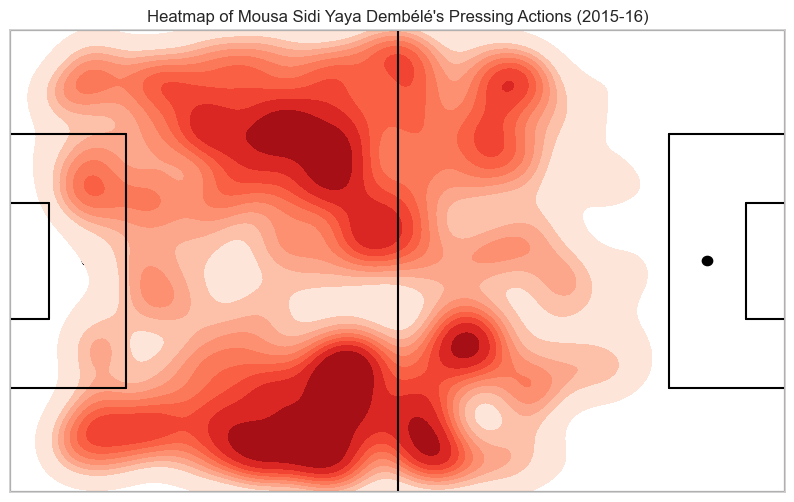

In [69]:
plot_pressure_heatmap('Mousa Sidi Yaya Dembélé')

**Eriksen**

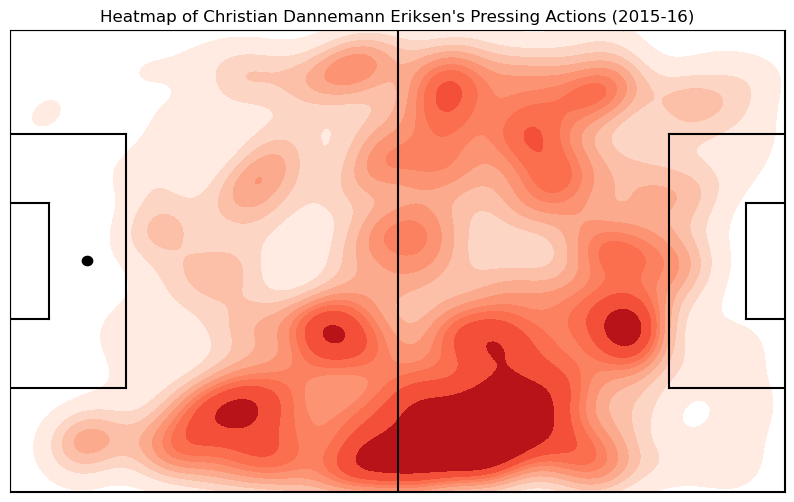

In [14]:
plot_pressure_heatmap('Christian Dannemann Eriksen')

**Harry Kane**

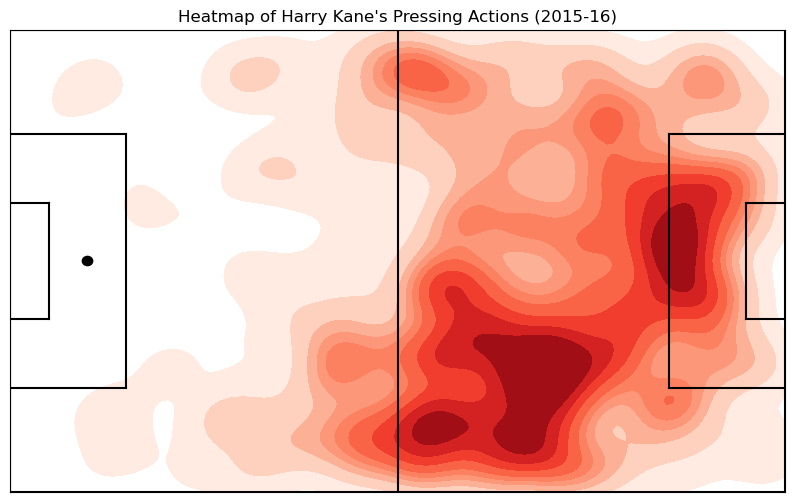

In [13]:
plot_pressure_heatmap('Harry Kane')

> The heatmaps support the idea that Pochettino implemented a high-press system, with many pressing actions occurring high up the pitch. However, this doesn’t tell the whole story, while players committed presses in advanced areas, the heatmaps also show that many of their most active zones were still around their natural positions. Still, the data gives us a clearer overall picture of Pochettino’s high press system

# High Defensive Line

To analyze Pochettino’s defensive setup, we can examine where his players most frequently performed defensive actions on the pitch.

Typically, this is done differenly by using a metric called **Defensive Line Height (DLH)**, which is the distance between a team’s goal line and its deepest outfield player. DLH helps indicate how deep a team defends when out of possession, and how far forward the defensive unit pushes when the team has the ball.

While we don't have full out-of-possession tracking data, we can still approximate the team’s defensive shape by gauging its **Defensive Action Height (DAH)**, which is the the average pitch location where defensive actions like tackles, interceptions, pressures, and recoveries take place. This gives us a reasonable gauge for where Pochettino’s defensive unit was typically positioned. We will also compare this to other teams in the 15/16 season. 

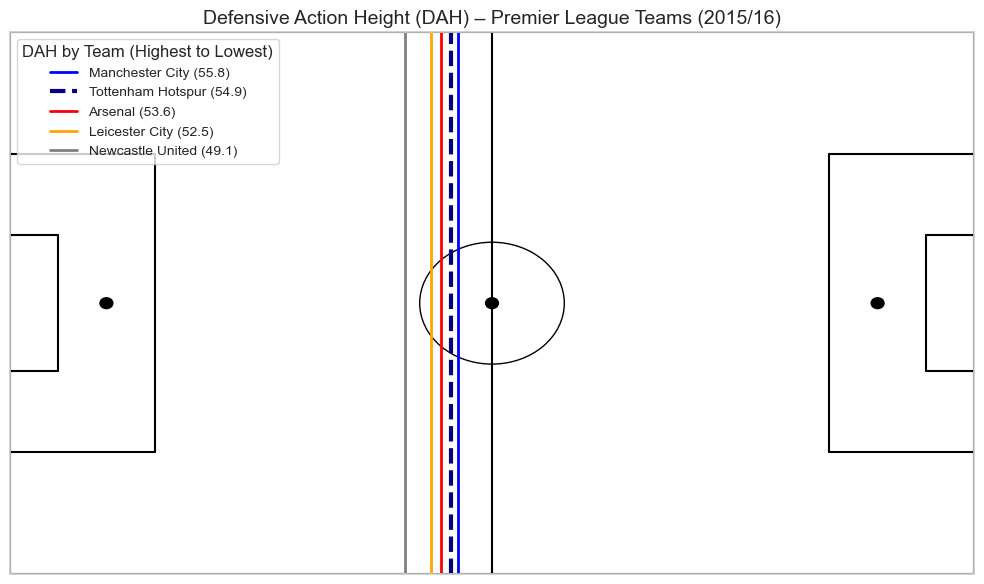

In [103]:
# Filter for all defensive actions
df_defense = df_all_events[df_all_events["type"].isin(["Pressure", "Tackle", "Ball Recovery", "Interception"])].copy()

# x-location
df_defense["x"] = df_defense["location"].apply(lambda loc: loc[0] if isinstance(loc, list) else None)

# Calculate DAH for all teams
dah_by_team = df_defense.groupby("team")["x"].mean()

# Select Teams to visualize
teams_to_plot = {"Manchester City": "blue", 
                 "Tottenham Hotspur": "navy",
                 "Arsenal": "red",
                 "Leicester City": "orange",
                 "Newcastle United": "gray",}

# plot graph 
fig, ax = plt.subplots(figsize=(10, 6))
ax = draw_pitch(ax)

# Plot each team's DAH line
for team, color in teams_to_plot.items():
    team_dah = dah_by_team[team]
    linewidth = 3 if team == "Tottenham Hotspur" else 2
    linestyle = '--' if team == "Tottenham Hotspur" else '-'
    line = ax.axvline(team_dah, color=color, linestyle=linestyle, linewidth=linewidth, label=f"{team} ({team_dah:.1f})")

# plot details
ax.legend(loc='upper left', fontsize=10, title="DAH by Team (Highest to Lowest)")
plt.title("Defensive Action Height (DAH) – Premier League Teams (2015/16)", fontsize=14)
plt.tight_layout()
plt.show()




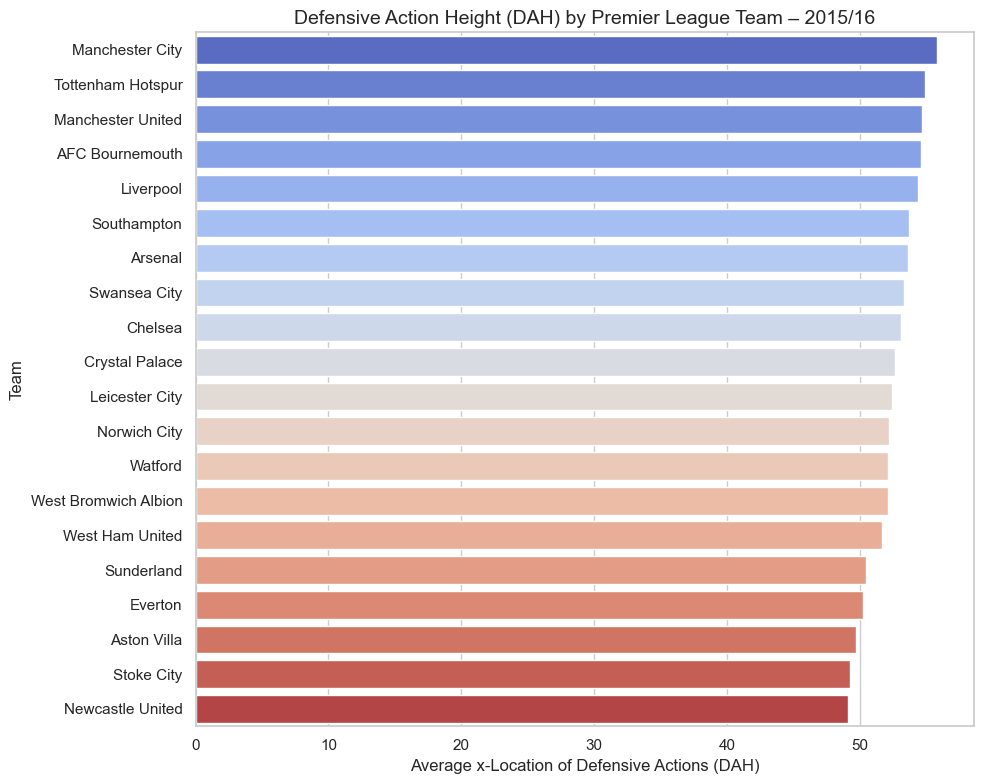

In [111]:
# plot bar chart for DAH by PL team
dah_ranked = dah_by_team.sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=dah_ranked.values, y=dah_ranked.index, palette="coolwarm")
plt.title("Defensive Action Height (DAH) by Premier League Team – 2015/16", fontsize=14)
plt.xlabel("Average x-Location of Defensive Actions (DAH)")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


## Offsides Drawn

>To support the findings from the DAH metric, we can also consider the number of offsides Spurs drew over the season. Teams that deploy a high defensive line are more likely to catch opponents offside, as they push their backline higher up the pitch. Pochettino’s Spurs drew the **second-most offsides** in the league (tied with liverpool), which can reinforce that they not only played a high line, but also executed it effectively to set offside traps and disrupt attacks.

>Again, is important to note that this is only a mere inference made based on the the statistics shown. 


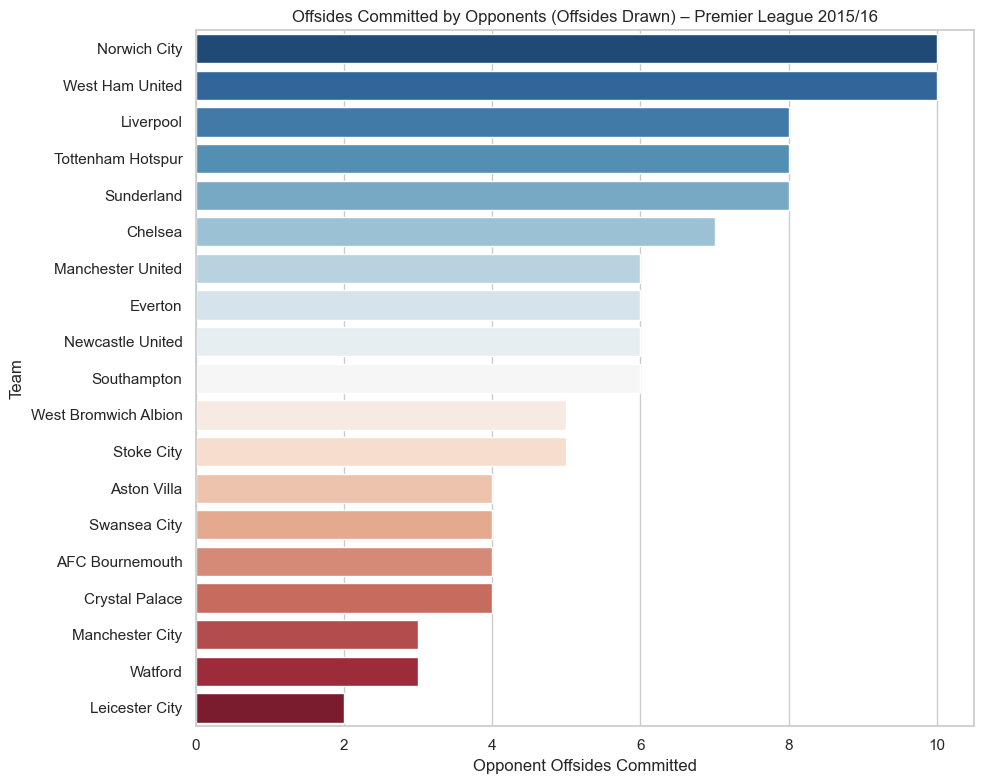

In [128]:
# Filter for Offside events
df_offsides = df_all_events[df_all_events["type"] == "Offside"]
offsides_against_teams = df_offsides["possession_team"].value_counts().sort_values(ascending=False)

# plot offsides drawn by team 
plt.figure(figsize=(10, 8))
sns.barplot(x=offsides_against_teams.values, y=offsides_against_teams.index, palette="RdBu_r")
plt.title("Offsides Committed by Opponents (Offsides Drawn) – Premier League 2015/16")
plt.xlabel("Opponent Offsides Committed")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


**Locations of Offsides Drawn**

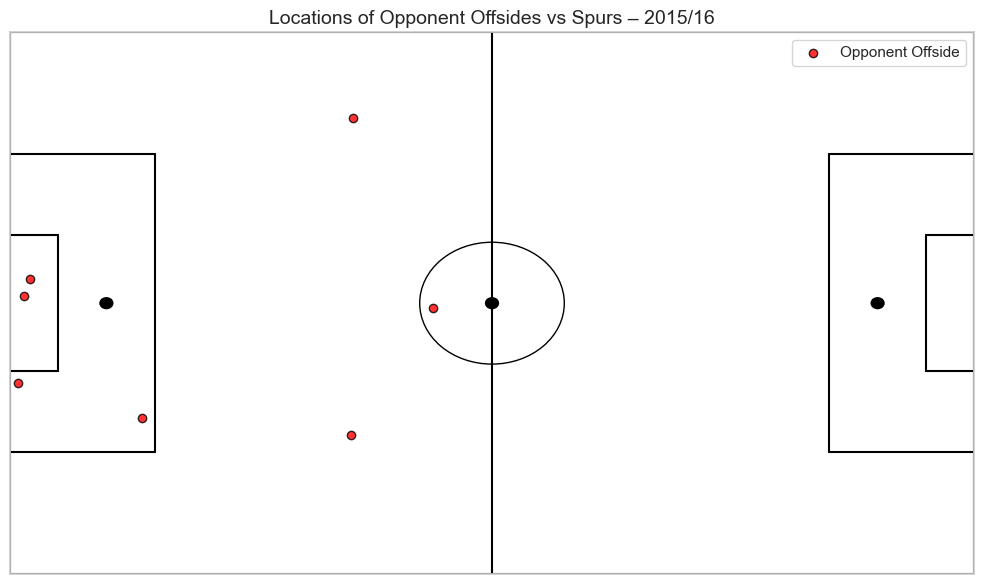

In [126]:

# Filter Offside Events Against Spurs
offsides_against_spurs = df_all_events[
    (df_all_events["type"] == "Offside") &
    (df_all_events["team"] != "Tottenham Hotspur")&
    (df_all_events["match_id"].isin(spurs_matches["match_id"].unique() )).copy()]

# x, y locations
offsides_against_spurs["x"] = offsides_against_spurs["location"].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
offsides_against_spurs["y"] = offsides_against_spurs["location"].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
offsides_against_spurs.dropna(subset=["x", "y"], inplace=True)
offsides_against_spurs["x"] = 120 - offsides_against_spurs["x"]
    
# Plot where offsides were drawn 
fig, ax = plt.subplots(figsize=(10, 6))
ax = draw_pitch(ax)
ax.scatter(offsides_against_spurs["x"],offsides_against_spurs["y"],color="red",alpha=0.8,edgecolor="black",label="Opponent Offside")
plt.title("Locations of Opponent Offsides vs Spurs – 2015/16", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


# Brief Analysis of Poch's Tactical System 



> Overall, the data confirms much of what we’ve suspected about Pochettino’s tactical system. The visualisations suggest that he favoured a **high line and high-press approach, with a strong emphasis on fullbacks driving the attack.** It’s also clear that central midfielders played a key role, often pushing into the final third to link up with target man Harry Kane, especially when the fullbacks weren't the ones delivering the final pass.  
> 
> While this system brought Pochettino a fair amount of success, it's important to note that other factors also played a role, including player availability, team chemistry, and the strategies of opposing teams.  
> 
> Ultimately, this notebook aims to provide a clear and brief visualisation of Pochettino’s well-known tactical style during his time at Spurs.

